In [1]:
import math
import random
import matplotlib.pyplot as plt

def graph(probabilities, formula, title):
    #takes probabilities vector and makes a graph of how probability changes over the simulations
#     plt.plot(probabilities)
#     plt.axhline(y = formula, color = 'r')
    err = [abs(probs - formula) for probs in probabilities]
    plt.axhline(y = 0, color = 'b', linewidth = 0.25)
    plt.plot(err, color = 'k')
    plt.ylabel('Error')
    plt.xlabel('Simulations')
    plt.title(title)
    ax = plt.gca()
    ax.set_ylim([-0.05, .05])
    plt.show()

# Need a generating function that generates a winning door
def Generator(w,t): # p = picked doors that win, t = total doors
    winners = []
    for i in range(w):
        possible_winner = random.randint(1,t) # we generate a possible winner
        while possible_winner in winners: # this is checking if a possible winner is duplicated
            possible_winner = random.randint(1,t) # generates new possible winner until non-duplicate
            
        winners.append(possible_winner) # appends non-duplicate winner
    
    winners.sort()
            
    return winners

# Need a removing function that removes a door that is NOT picked or winning
def Remover(r,t,w,p): # r = how many to remove, t = total doors, w = winning doors, p = picked door by contestant
    doors = [] # define door vector
    if r+len(w)+len(p)>t:
        raise Exception("This is impossible as there are not enough doors, try decreasing 'r' or 'p' or increasing 't'.")
    
    for i in range(t):
        doors.append(i+1) # generate all doors
    
    for elements in w:
        index = doors.index(elements)
        del doors[index] # remove the winning doors
        
    for elements in p:
        if elements in w:
            continue
        else:
            index = doors.index(elements) # removed the door/s picked by contestant
            del doors[index]
        
    for i in range(r):
        rand = random.randint(0,len(doors)-1)
        del doors[rand]
            
    for elements in w:
        doors.append(elements) # add the winning doors back
        
    for elements in p:
        if elements in w:
            continue
        else:
            doors.append(elements) # add the picked door/s back
    
    doors.sort()
        
    
    return doors

# Thus we need a pick function that gets us a picked door
def Pick(p,t): # p = number of picked doors, t = total doors
    picked = []
    for i in range(p):
        possible_pick = random.randint(1,t) # we generate a possible winner
        while possible_pick in picked: # this is checking if a possible winner is duplicated
            possible_pick = random.randint(1,t) # generates new possible winner until non-duplicate
            
        picked.append(possible_pick) # appends non-duplicate winner
    
    picked.sort()
    
    return picked

# For our problem, we'll need a switch function that allows for us to switch doors
def Switch(f, p): # f = final_doors, p = picked_doors
    if len(f)<2*len(p):
        raise Exception("This is impossible as there are not enough doors, try decreasing 'r' or 'p' or increasing 't'.")
    
    counter = 0 # counter
    new_p = [] # new doors
    
    while counter < len(p):
        rand = random.randint(0, len(f)-1)
        if f[rand] in p: # make sure new door is not one of old doors
            continue
        else:
            if f[rand] in new_p: # make sure new door isn't already a new door
                continue
            else:
                new_p.append(f[rand])
                counter+=1
         
    new_p.sort()
        
    return new_p
    
# Now we have everything to build a Monty Hall function, giving us the probability of winning when you switch doors
def MontyHall(p, n, r, i): # t = total doors, p = total picked, r = total removed, i = number of trials
    
    switch_wins = []
    no_switch_wins = []
    
    counter = 0
    
    for j in range(i):
        a = Generator(p, t)
        b = Pick(p, t)
        c = Remover(r, t, a, b)
        d = Switch(c, b)

        d = set(d)
        a = set(a) # Makes these sets for intersection function
        b = set(b)
        
        for k in range(len(d.intersection(a))):
            counter+=1

    prob_counter = counter/(i*p)

    return prob_counter

# Since the probability of keeping the door is NOT the complement of the probability of switching, we need a function that does both probabilities
def MontyHall2(p, t, r, i): # t = total doors, p = total picked, r = total removed, i = number of trials
    
    switch_wins = []
    no_switch_wins = []
    
    for j in range(i):
        a = Generator(p, t)
        b = Pick(p, t)
        c = Remover(r, t, a, b)
        d = Switch(c, b)

        d = set(d)
        a = set(a) # Makes these sets for intersection function
        b = set(b)
        
    switch_wins.append(list(d.intersection(a))) # list has 1's and empty lists, need lists back for length
                
    no_switch_wins.append(list(b.intersection(a))) # however, we need to remove/ignore [], since they are loses
        
    prob_switch_wins = len(list(filter(None, switch_wins)))/(p*i) # needs to look at [1] and ignore [], which the filter function does
    
    prob_no_switch_wins = len(list(filter(None, no_switch_wins)))/(p*i) # these find the mean of the iterations, len/total
    
    print("Probability with Switching %.5f vs. Probability without Switching %.5f" % (prob_switch_wins, prob_no_switch_wins))
    

# Want a function that has different amount of winning doors vs picked doors
def MontyHall3(w, p, t, r, i): # w = winning doors, t = total doors, p = total picked, r = total removed, i = number of trials
    
    switch_wins = []
    no_switch_wins = []
    graphProbSwitch = []
    graphProbNoSwitch = []
    
    for j in range(1,i+1):
        a = Generator(w, t)
        b = Pick(p, t)
        c = Remover(r, t, a, b)
        d = Switch(c, b)

        d = set(d)
        a = set(a) # Makes these sets for intersection function
        b = set(b)
        
        if len(list(d.intersection(a))) > 1:
            for k in list(d.intersection(a)):
                switch_wins.append(k)
        else:
            switch_wins.append(list(d.intersection(a))) # list has 1's and empty lists, need lists back for length
        
        if len(list(b.intersection(a))) > 1:
            for k in list(b.intersection(a)):
                no_switch_wins.append(k)
                
        else:
            no_switch_wins.append(list(b.intersection(a)))
            
        graphProbSwitch.append(len(list(filter(None, switch_wins)))/(p*j))
        
        graphProbNoSwitch.append(len(list(filter(None, no_switch_wins)))/(p*j))
        
    formula_switch = ((t-p)/t)*(w/(t-p-r))
        
    formula_no_switch = w/t
        
    graph(graphProbSwitch, formula_switch, 'Error Graph of Switching')
    
    graph(graphProbNoSwitch, formula_no_switch, 'Error Graph of Not Switching')
        
    prob_switch_wins = len(list(filter(None, switch_wins)))/(p*i) # needs to look at [1] and ignore [], which the filter function does
    
    prob_no_switch_wins = len(list(filter(None, no_switch_wins)))/(p*i) # these find the mean of the iterations, len/total
    
    print("Probability with Switching {0} vs. Probability without Switching {1}.".format(prob_switch_wins, prob_no_switch_wins))
    
    print("Formula for Switching {0} vs. Formula for Not Switching {1}.".format(formula_switch, formula_no_switch))
    
    
# Want this one to give the probability of winning at least once
def MontyHall4(w, p, t, r, i): # w = winning doors, t = total doors, p = total picked, r = total removed, i = number of trials
    
    switch_wins = []
    no_switch_wins = []
    graphProbSwitch = []
    graphProbNoSwitch = []
    
    for j in range(1, i+1):
        a = Generator(w, t)
        b = Pick(p, t)
        c = Remover(r, t, a, b)
        d = Switch(c, b)

        d = set(d)
        a = set(a) # Makes these sets for intersection function
        b = set(b)
        
        switch_wins.append(list(d.intersection(a))) # list has 1's and empty lists, need lists back for length
                
        no_switch_wins.append(list(b.intersection(a))) # however, we need to remove/ignore [], since they are loses
        
        graphProbSwitch.append(len(list(filter(None, switch_wins)))/(j))
        
        graphProbNoSwitch.append(len(list(filter(None, no_switch_wins)))/(j))
        
    prob_none = 0 # initialize the summation
    s = t-p-r
    for l in range(p+1): # l = total w's picked
        prob_first_pick = 1 # initialize the products
        prob_none_switch = 1
        denominator = 1

        for k1 in range(p-l): # does probability for the no w's picked when divided by the denominator
            prob_first_pick = (t-w-k1) * prob_first_pick

        for k2 in range(l): # does probability for the w's picked when divided by the denominator
            prob_first_pick = (w-k2) * prob_first_pick

        for d in range(p): # does the product of the doors left after choosing doors
            denominator = (1/(t-d)) * denominator 

        prob_first_pick = prob_first_pick * denominator    

        prob_first_pick = prob_first_pick * math.factorial(p)/(math.factorial(l)*math.factorial(p-l)) # p choose l

        for j in range(p): # look at the remaining doors and find the probability of winning
            prob_none_switch = (s-w+l-j)/(s-j) * prob_none_switch

        prob_none += prob_first_pick * prob_none_switch # sum each iteration for losing probability

    formula_switch = 1 - prob_none # take complement of losing prob to get at least one win prob
        
    formula_no_switch = 1 - (math.factorial(t-w)*math.factorial(t-p))/(math.factorial(t)*math.factorial(t-w-p))
        
    graph(graphProbSwitch, formula_switch, 'Error Graph of Switching')
    
    graph(graphProbNoSwitch, formula_no_switch, 'Error Graph of Not Switching')
        
    prob_switch_wins = len(list(filter(None, switch_wins)))/(i) # needs to look at [1] and ignore [], which the filter function does
    
    prob_no_switch_wins = len(list(filter(None, no_switch_wins)))/(i) # these find the mean of the iterations, len/total
    
    # Dividing by i rather than p*i because we want the probability based on trials, not on each chance of the picked
    
    print("Probability with Switching {0} vs. Probability without Switching {1}.".format(prob_switch_wins, prob_no_switch_wins))
    
    print("Formula for Switching {0} vs. Formula for Not Switching {1}.".format(formula_switch, formula_no_switch))
    
    

In [2]:
w = 4
p = 7
t = 20
r = 1
i = 100000

Simulation: 


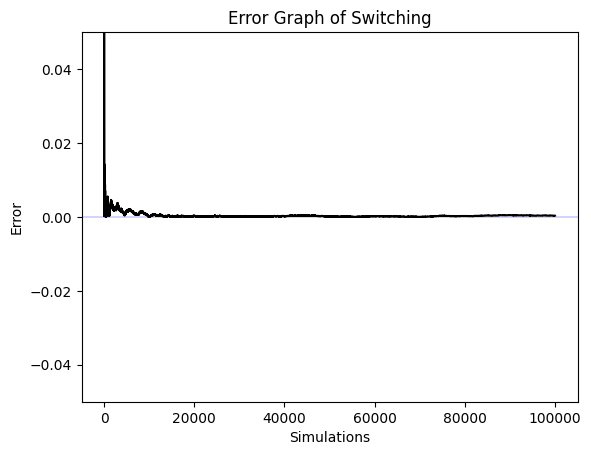

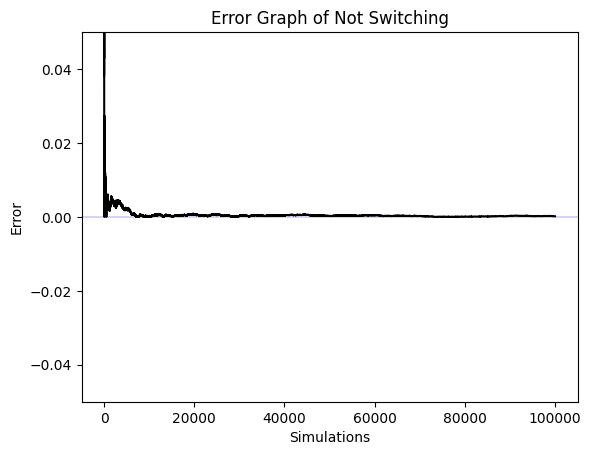

Probability with Switching 0.21701428571428572 vs. Probability without Switching 0.19982857142857144.
Formula for Switching 0.21666666666666667 vs. Formula for Not Switching 0.2.
This took 292.26 seconds.


In [3]:
import time

start = time.time()

print('Simulation: ') 
MontyHall3(w,p,t,r,i)

# Check
# switch_form = ((t-p)/t)*(w/(t-p-r))
# no_switch_form = w/t

# print('Formula for switching: %.5f' % switch_form)
# print('Formula for not switching %.5f' % no_switch_form)

end = time.time()

time = end - start

print("This took %.2f seconds." % time)

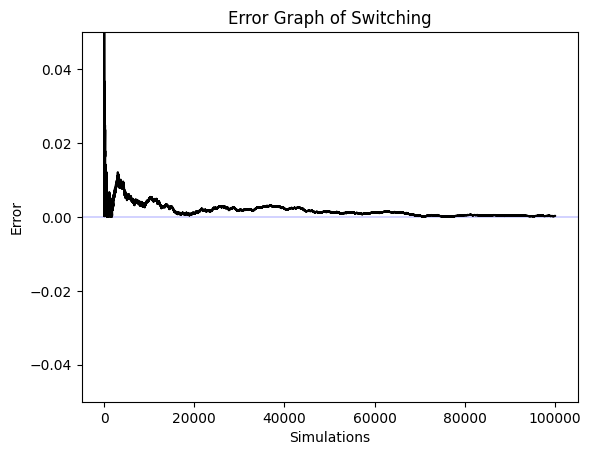

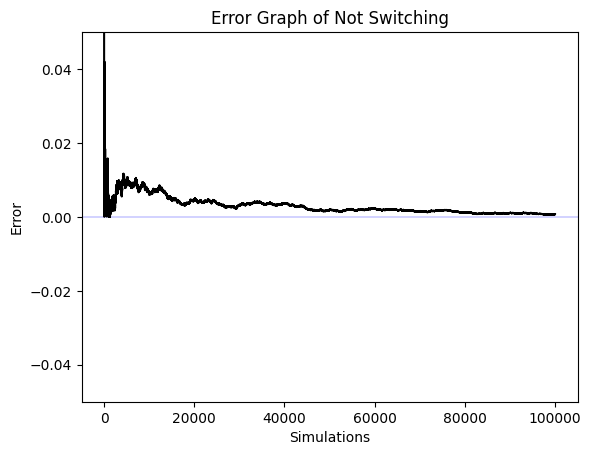

Probability with Switching 0.88241 vs. Probability without Switching 0.85172.
Formula for Switching 0.8821491488674151 vs. Formula for Not Switching 0.8524251805985552.
This took 130.37 seconds.


In [4]:
import time

start = time.time()

MontyHall4(w, p, t, r, i)

# no_switch_form = 1 - (math.factorial(t-w)*math.factorial(t-p))/(math.factorial(t)*math.factorial(t-w-p))

# Formula is 1 - ((t-w)!(t-p)!)/(t!(t-w-p)!) without switching

# prob_none = 0 # initialize the summation
# s = t-p-r
# for l in range(p+1): # l = total w's picked
#     prob_first_pick = 1 # initialize the products
#     prob_none_switch = 1
#     denominator = 1

#     for k1 in range(p-l): # does probability for the no w's picked when divided by the denominator
#         prob_first_pick = (t-w-k1) * prob_first_pick

#     for k2 in range(l): # does probability for the w's picked when divided by the denominator
#         prob_first_pick = (w-k2) * prob_first_pick
        
#     for d in range(p): # does the product of the doors left after choosing doors
#         denominator = (1/(t-d)) * denominator 

#     prob_first_pick = prob_first_pick * denominator    
        
#     prob_first_pick = prob_first_pick * math.factorial(p)/(math.factorial(l)*math.factorial(p-l)) # p choose l

#     for j in range(p): # look at the remaining doors and find the probability of winning
#         prob_none_switch = (s-w+l-j)/(s-j) * prob_none_switch

#     prob_none += prob_first_pick * prob_none_switch # sum each iteration for losing probability

# switch_form = 1 - prob_none # take complement of losing prob to get at least one win prob

# print('Formula for switching {0}'.format(switch_form))

# print('Formula for not switching {0}'.format(no_switch_form))

end = time.time()

time = end - start

print("This took %.2f seconds." % time)

In [5]:
#w=2,p=2,r=1,t=7

# 5/7 * 4/6 not picking t-p-r=s

# so if one is removed, then switch doors = 4

# thus the probability of not winning is picked is (2/4)*(1/3)

# 2/7 * 5/6 picking one, 

# thus the probability of not winning is (3/4)*(2/3)

# 2/7 * 1/6 picking both,

# thus the probability of not winning is 1


print(1 - ((2/7 * 1/6) + 2*(2/7)*(5/6)*(3/4)*(2/3) + (5/7)*(4/6)*(1/2)*(1/3)))




# w=2, p=3, r=1, t=7

# 5/7 * 4/6 * 3/5 not picking s = 3

# So probability of losing = 0

# 2/7 * 5/6 * 4/5 picking one

# So probability not picking is 0

# 2/7 * 1/6 * 5/5 picking both

# probability is 1

print(1 - 3*(2/7)*(1/6))


#w=4, p=3, r=1, t=9, s = t-p-r = 5

# 5/9 * 4/8 * 3/7 not picking one S = 5

# So probability of losing = 0

# 4/9 * 5/8 * 4/7 picking one

# So probability of losing = 0

# 4/9 * 3/8 * 5/7 picking two

# SO probability of losing = 3/5 * 2/4 * 1/3

# 4/9 * 3/8 * 2/7 picking three

# So probability of losing = 4/5 * 3/4 * 2/3


print(1 - ((4/9) * (3/8) * (2/7) * (4/5) * (3/4) * (2/3) + 3 * (4/9) * (3/8) * (5/7) * (3/5) * (2/4) * (1/3)))


0.6349206349206349
0.8571428571428572
0.9452380952380952
